In [1]:
%load_ext autoreload
%autoreload 2

## step1 data 

In [2]:
from data.pricevolume import PriceVolume
pv = PriceVolume(path='/Users/Hans/Desktop/HunterAlpha/KitKitDataSets/BinanceData/6h/')
pv.build()

In [3]:
print(pv.dates[0], pv.dates[-1])

2019-04-26 08:00:00 2019-09-23 08:00:00


## step 2 resample

In [4]:
from data.resample import Resample
rs = Resample(IS_start=None, IS_end=None, OOS_start=None, OOS_end=None, IS_OOS_ratio=0.7)
IS_Data, OOS_Data = rs.build(pv)

## step 3 alpha

In [5]:
from alpha.alpha_101 import Alpha_101
alpha = Alpha_101()
alpha = alpha.build(IS_Data)

## step 4 Deal 

In [8]:
from traders.close_deal import CloseDeal
p=CloseDeal(IS_Data, alpha, 10, 1)
p.build()

## step 5 performace

In [10]:
from evaluators.original_perform import OriginalPerform
op = OriginalPerform(p, cost=0.001)
op.build()

                                           Alpha Turnover  Alpha PNL  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00            0.63     -0.155   

                                           Net Alpha PNL  Alpha Sharpe  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00         -0.414        -0.656   

                                           Net Alpha Sharpe  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00            -1.745   

                                           Alpha Max Drawdown  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00               0.228   

                                           Alpha Max DrawdownPeriod  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00                       321   

                                           Net Alpha Max Drawdown  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00                   0.458   

                                           Net Alpha Max DrawdownPeriod  \
2019-04-28 20:00:00 - 2019-08-09 08:00:00                           406   

               

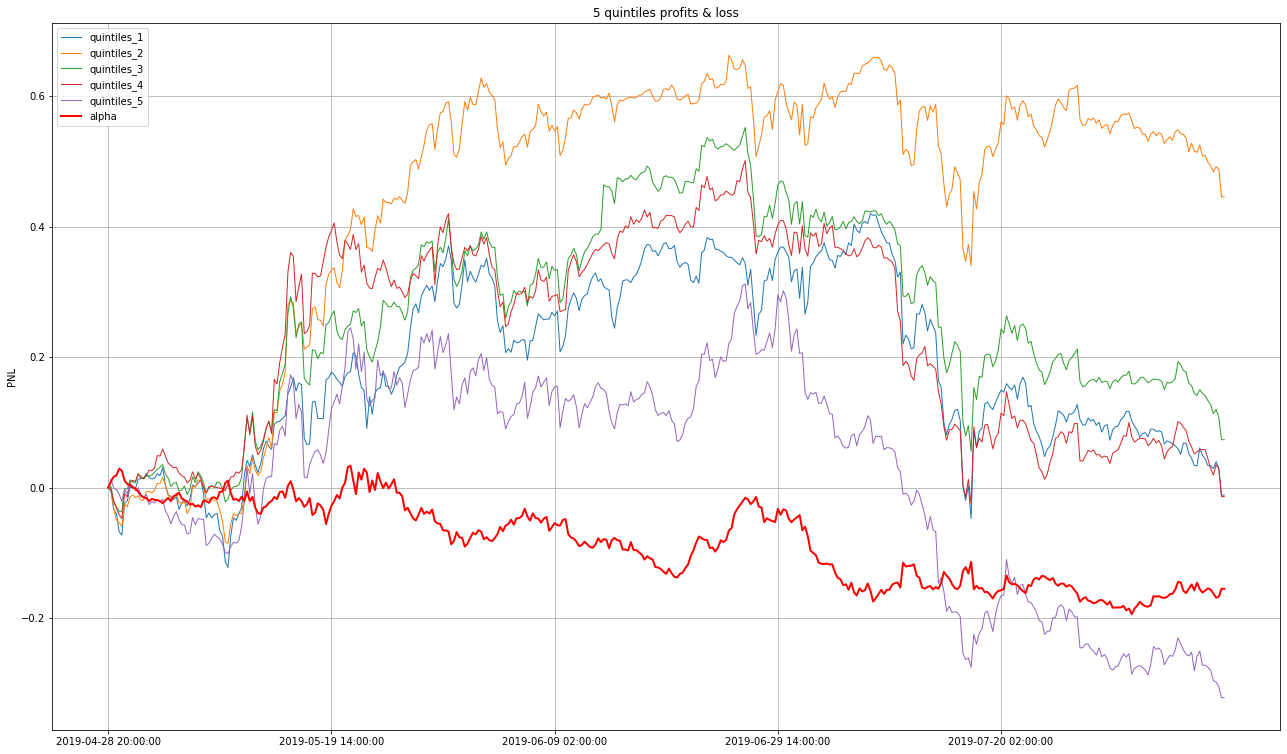

In [15]:
%matplotlib inline
from evaluators.alpha_perform import AlphaPerform
ap = AlphaPerform(p, cost=0.001, cycle='DAY', quintiles_num=5)
ap.build()


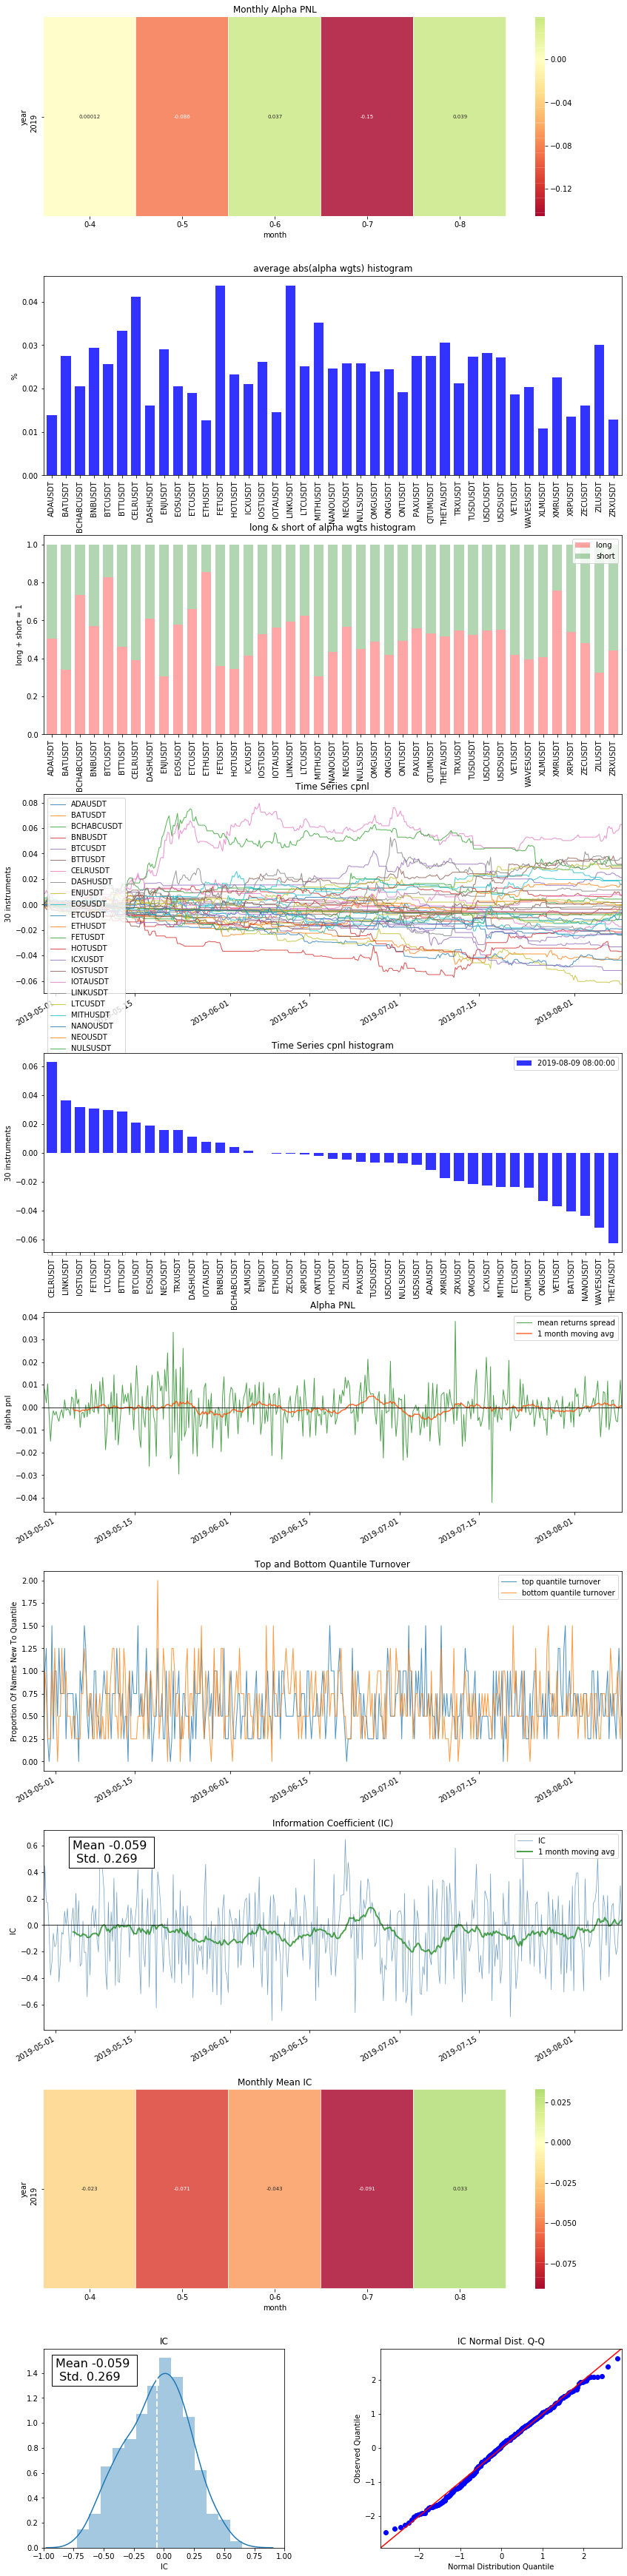

In [16]:
from evaluators.analysis_plot import AnalysisPlot
AnalysisPlot(pv, p, op, ap).build()